In [2]:
import pandas as pd
from pdvega import Axes as Vega

# Coded overview

This notebook gives an overview of the demographics of the participants and the distribution of answers in the survey and the questionnaire.

## Load data

In [6]:
study = pd.read_pickle("outputs/201907121200_transitions.pkl", compression="gzip")

## Age distribution

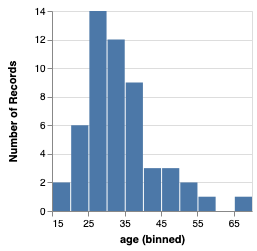

In [3]:
age = (pd.read_csv("inputs/coded/20190730-pilot3-answers - Jonas.csv", na_values="na")
    .query("chart == '@answer: age'")
    .filter(["user", "age"])
)
Vega({
    "mark": "bar",
    "encoding": {
        "x": {
            "field": "age",
            "type": "quantitative",
            "bin": True
        },
        "y": {
            "aggregate": "count",
            "type": "quantitative"
        }
    }
}, age)

## Colorblind?

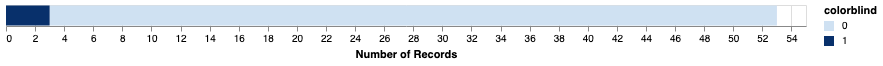

In [7]:
colorblind = (pd.read_csv("inputs/coded/20190730-pilot3-answers - Jonas.csv", na_values="na")
    .query("chart == '@answer: color'")
    .filter(["user", "correct?"])
    .rename({"correct?": "colorblind"}, axis=1)
    .replace({0:1, 1:0})
)
Vega({
    "mark": "bar",
    "encoding": {
        "x": {
            "aggregate": "count",
            "type": "quantitative"
        },
        "color": {
            "field": "colorblind",
            "type": "ordinal"
        }
    },
    "width": 800
}, colorblind)

## Gender distribution

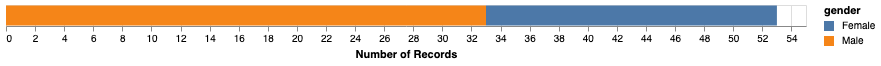

In [8]:
gender = (study
          .query("chart == '@answer: gender'")
          .filter(["user", "message"])
          .rename({"message": "gender"}, axis=1)
)
Vega({
    "mark": "bar",
    "encoding": {
        "color": {
            "field": "gender",
            "type": "nominal"
        },
        "x": {
            "aggregate": "count",
            "type": "quantitative"
        }
    }, "width": 800
}, gender)

## Level of education

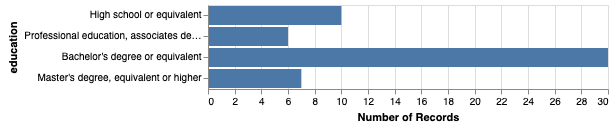

In [9]:
level_of_education = (study
                        .query("chart == '@answer: education'")
                        .filter(['user', 'message'])
                        .rename({"message": "education"}, axis=1)

                     )
Vega({
    "mark": "bar",
    "encoding": {
        "y": {"field": "education", "type": "ordinal", "sort": ["Primary education",
                            "High school or equivalent",
                            "Professional education, associates degree or equivalent",
                            "Bachelor degree or equivalent",
                            "Master degree, equivalent or higher"]
             },
        "x": {"aggregate": "count", "type": "quantitative"}
    }, "width": 400
}, level_of_education)

## Sight

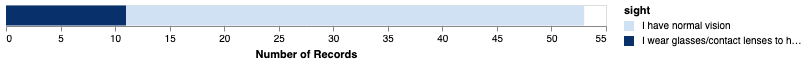

In [10]:
sight = (study
            .query("chart == '@answer: sight'")
            .filter(['user', 'message'])
            .rename({"message": "sight"}, axis=1)
         )
Vega({
    "mark": "bar",
    "encoding": {
        "color": {"field": "sight", "type": "ordinal"},
        "x": {"aggregate": "count", "type": "quantitative"}
    }, "width": 600
}, sight)

## Engagement

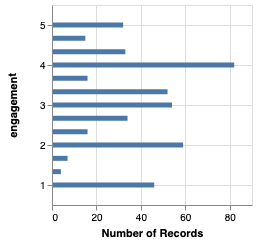

In [11]:
engagement = (study
           .query("chart.str.contains('@answer: QFAS')")
            .filter(["session", "message"])
            .replace({
                "Strongly disagree": 1,
                "Disagree": 2,
                "Neither agree nor disagree": 3,
                "Agree": 4,
                "Strongly agree": 5
            })
            .rename({"message": "engagement"}, axis=1)
            .groupby("session")
            .agg({"engagement": "mean"})
       )
Vega({
    "mark": "bar",
    "encoding": {
        "y": {"field": "engagement", "type": "quantitative"},
        "x": {"aggregate": "count", "type": "quantitative"}
    }, 
},engagement)